In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

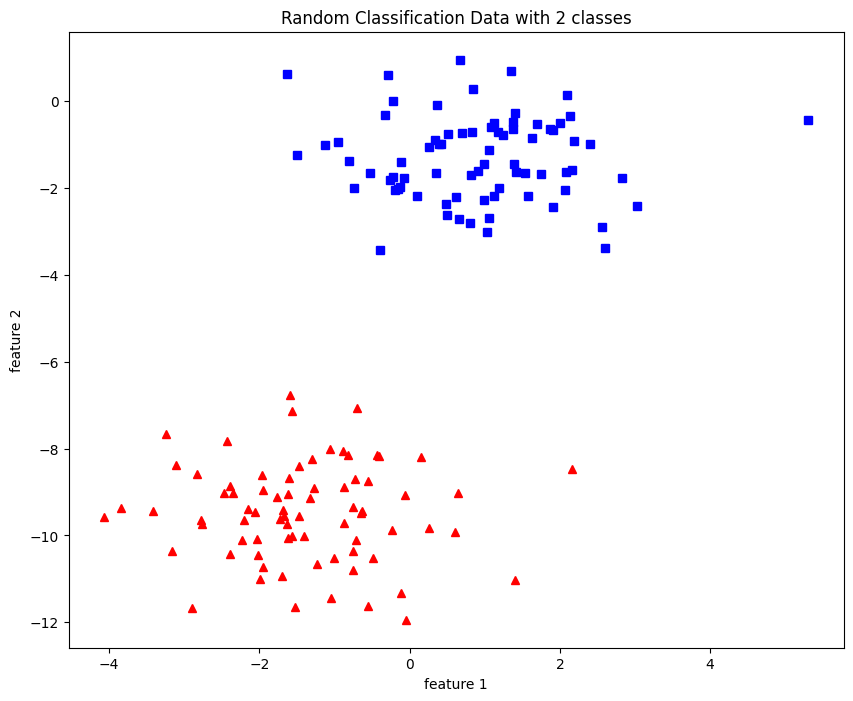

In [4]:
X, y = datasets.make_blobs (n_samples=150, n_features=2,centers=2, cluster_std=1.05,random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [20]:
def acti_func(z):
    if(z>0):
        return 1
    return 0



In [26]:
def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.zeros((n+1,1))
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  error_list=[]
  accuracy=[]
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
          w-=lr*(np.squeeze(y_hat) - y[idx])*x_i
      # Incrementing by 1.
          n_miss+=1
  # Appending number of misclassified examples
  # at every iteration.
    n_miss_list.append(n_miss)
    error_list.append(1-(m-n_miss)/m)
      
  return w, n_miss_list,error_list


In [27]:
def plot_decision_boundary(X,y, w):
    # Assuming X has shape (m, 2) for two-dimensional features
    plt.figure(figsize=(10, 8))

    # Scatter plot for class 0 (assuming binary classification)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='^', label='Class 0')

    # Scatter plot for class 1
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='s', label='Class 1')

    m = -w[1] / w[2]
    c = -w[0] / w[2]

    x1 = [min(X[:, 0]), max(X[:, 0])]
    x2 = m * x1 + c
    plt.plot(x1, x2, color='green' , label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

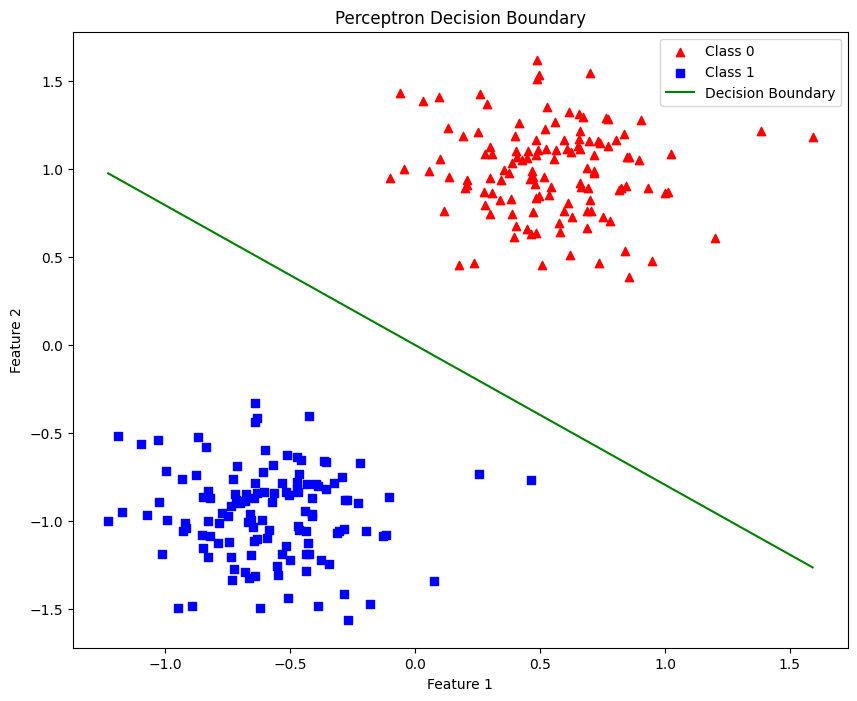

In [28]:
w, _,_ = perceptron(X, y, lr=0.01, epochs=3)
plot_decision_boundary(X,y, w)

# Exercice2

In [30]:
def generate_dataset(n_samples=10000, cluster_std1=0.25,center_box1=(1,0),cluster_std2=0.25,center_box2=(-1,0),random=False):
  if random:
    X1, y1 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std1, random_state=2, center_box=center_box1)
    X2, y2 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std2, random_state=2,center_box=center_box2)
  else:
    X1, y1 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std1, center_box=center_box1)
    X2, y2 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std2, center_box=center_box2)
  y2 = np.full((n_samples,), 1)

  X = np.concatenate((X1, X2), axis=0)
  y = np.concatenate((y1, y2), axis=0)

  # Shuffle the dataset
  X, y = shuffle(X, y, random_state=42)

  print("X shape:", X.shape)
  print("y shape:", y.shape)
  return X,y

# experience 1 : std=0.25


In [31]:
from sklearn.utils import shuffle

X,y=generate_dataset(n_samples=125,random=True)

X shape: (250, 2)
y shape: (250,)


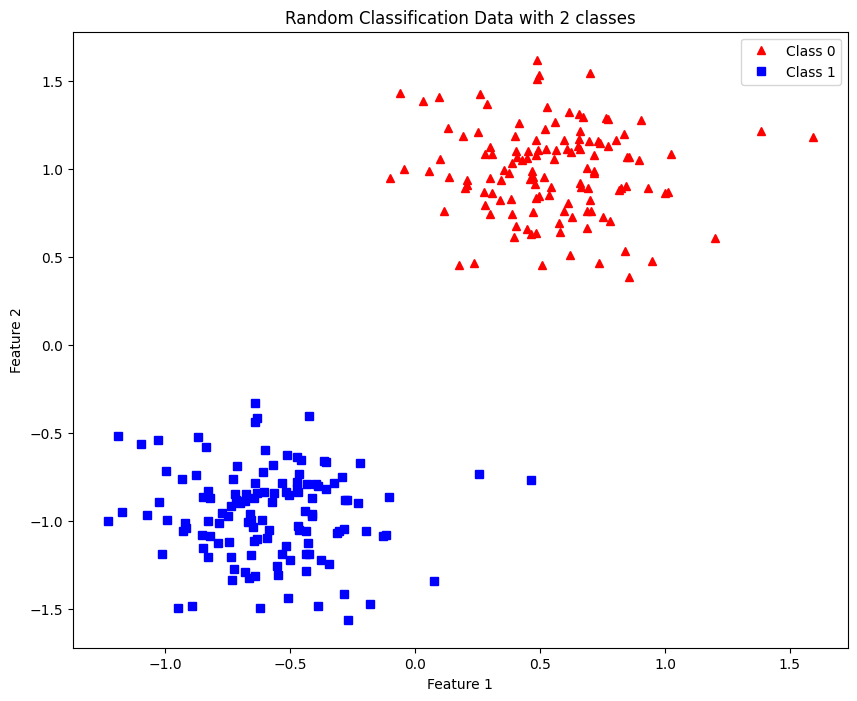

In [32]:
# Plotting
fig = plt.figure(figsize=(10, 8))

# Plot points with label 0 in red triangles ('r^')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')

# Plot points with label -1 in blue squares ('bs') - Corrected here
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 1')

# Set labels for the x and y axes
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Set the title of the plot
plt.title('Random Classification Data with 2 classes')

# Display a legend in the plot
plt.legend()

# Show the plot
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [34]:
# training
w_train,_,_ = perceptron(X_train,y_train,0.01,3)

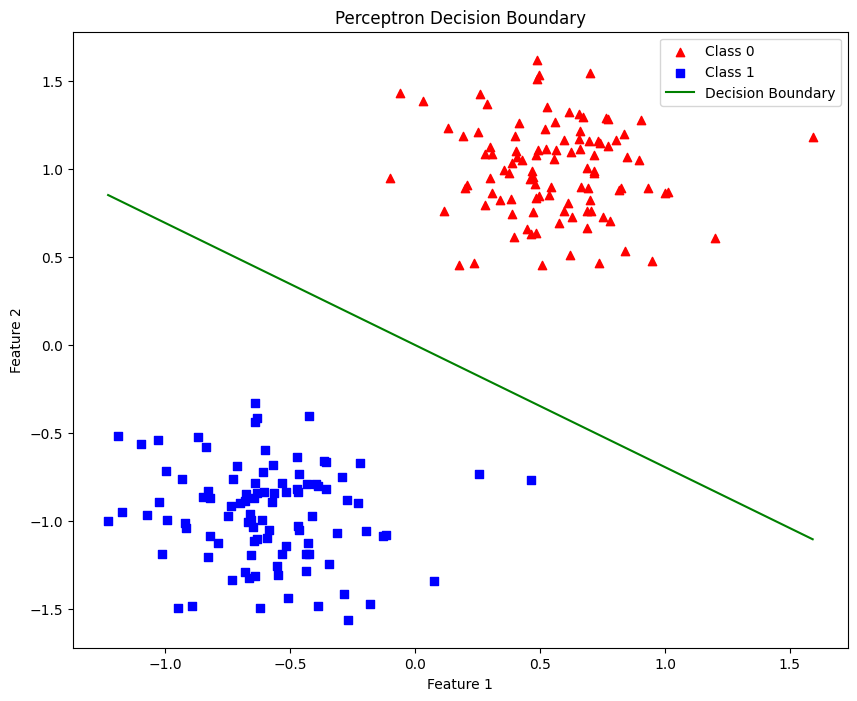

In [35]:
plot_decision_boundary(X_train,y_train, w_train)

In [36]:
def predict(weights, X_test):
    Z = np.squeeze(np.dot(X_test,weights[1:3])+weights[0])
    predictions = np.where(Z >= 0, 1, 0)
    return predictions

def accuracy(weights, X_test, y_test):
    y_pred = predict(weights, X_test)
    accuracy = np.mean(y_pred == y_test)
    missed_predictions = X_test[y_pred != y_test]
    return accuracy , 1-accuracy
print(accuracy(w_train,X_test,y_test))

(1.0, 0.0)


# experience 2 : std=0.75

In [37]:
X,y=generate_dataset(n_samples=125,cluster_std1=0.75,cluster_std2=0.75,random=True)

X shape: (250, 2)
y shape: (250,)


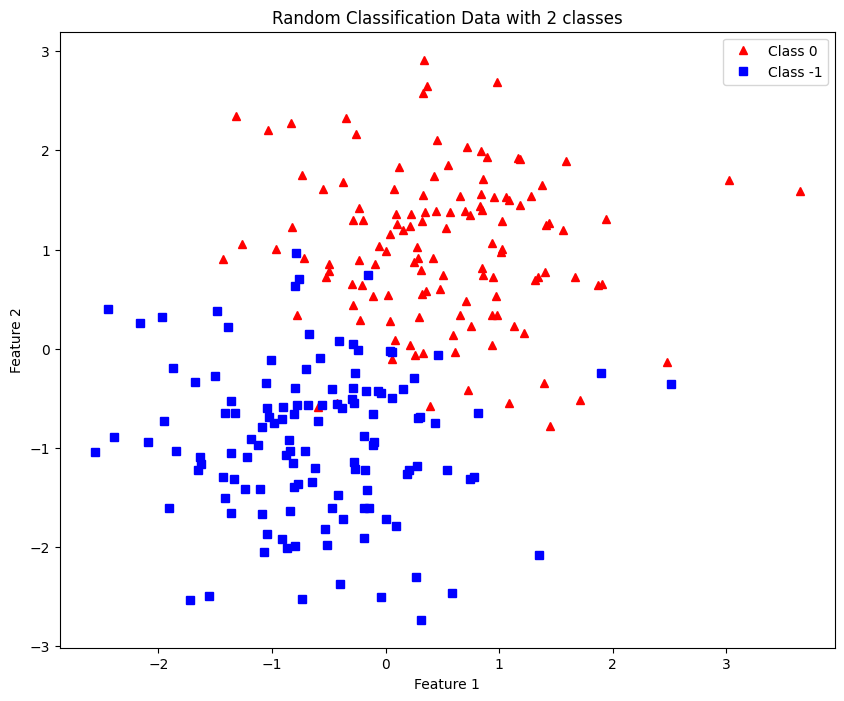

In [38]:
# Plotting
fig = plt.figure(figsize=(10, 8))

# Plot points with label 0 in red triangles ('r^')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')

# Plot points with label -1 in blue squares ('bs') - Corrected here
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class -1')

# Set labels for the x and y axes
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Set the title of the plot
plt.title('Random Classification Data with 2 classes')

# Display a legend in the plot
plt.legend()

# Show the plot
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
w_train,_ ,_= perceptron(X_train,y_train,0.01,3)
print(w_train)

[[ 0.        ]
 [-0.00894779]
 [-0.01942688]]


In [41]:
print(accuracy(w_train,X_test,y_test))

(0.98, 0.020000000000000018)


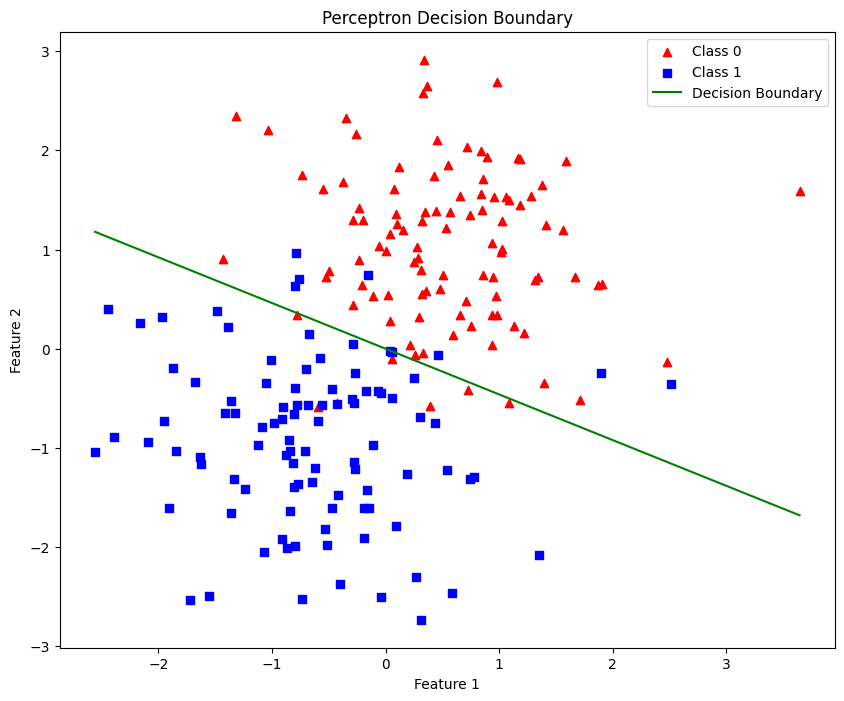

In [42]:
plot_decision_boundary(X_train,y_train, w_train)
     

# Experience 3 

In [43]:
def experience(n_samples,sigma):
  X,y=generate_dataset(n_samples=n_samples,cluster_std1=sigma,cluster_std2=sigma)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  weights,_,_=perceptron(X_train,y_train,0.01,30)
  exp_accuracy,exp_error=accuracy(weights, X_test, y_test)
  return exp_accuracy,exp_error

In [44]:
import numpy as np
import matplotlib.pyplot as plt

sigmas = [0.01, 0.1, 0.5, 0.7]

variances_error = []
means_error = []

for sigma in sigmas:
        print(f"*********for sigma = {sigma}********")
        errors=[]
        for i in range(30):
          print(f"experience {i+1} : ")
          exp_accuracy,exp_error=experience(125,sigma)
          print(f"accuracy : {exp_accuracy}**** error : {exp_error}")
          errors.append(exp_error)
        mean_error = np.mean(errors)
        variance_error = np.var(errors)
        means_error.append(mean_error)
        variances_error.append(variance_error)

plt.figure(figsize=(10, 6))

*********for sigma = 0.01********
experience 1 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 2 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 3 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 4 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 5 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 6 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 7 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 8 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 9 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 10 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 11 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 12 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** err

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [45]:
print(means_error)

[0.0, 0.0, 0.11733333333333337, 0.1913333333333333]


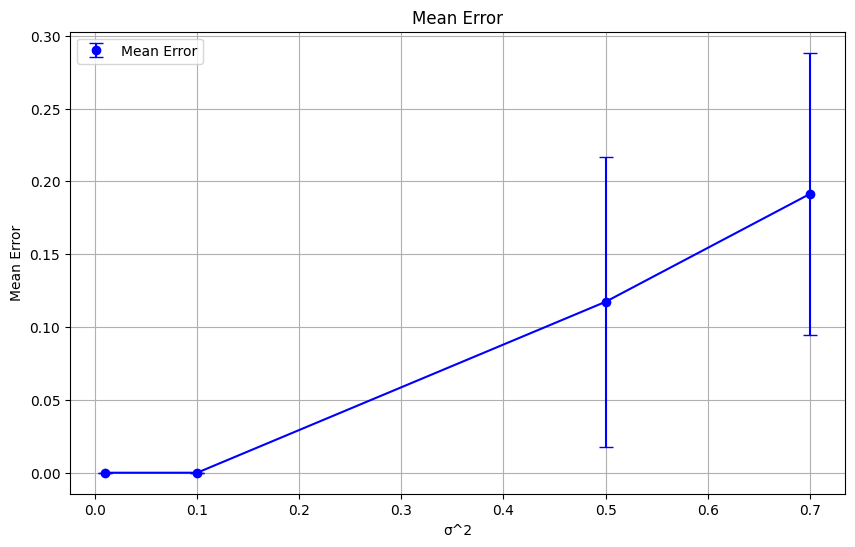

In [46]:
plt.figure(figsize=(10, 6))
plt.errorbar(sigmas, means_error, yerr=np.sqrt(variances_error), color='b', ecolor='blue', capsize=5,fmt='o', label='Mean Error')
plt.plot(sigmas, means_error, linestyle='-', marker='', color='blue')

plt.xlabel('σ^2')
plt.ylabel('Mean Error')
plt.title('Mean Error')
plt.legend()
plt.grid(True)
plt.show()